# Agent that masters Blackjack using Reinforcement Learning

## Part 1 
### Start by importing the necessary libraries

In [290]:
import gym                           # OpenAI's Gym 
import numpy as np                   # NumPy for numerical computations in Python
import matplotlib.pyplot as plt      # Visualization library in Python
from plot_utils import plot_blackjack_values

## Blackjack

Blackjack is a card game where the player plays against the dealer. The game is as follows:
1. The game starts off with 2 cards each, where only one is open for the other person to view and one is closed (2 open, 2 closed)
2. The player can take two actions: Hit or Stick. 
3. If the player receives or has an ace, he/she can use it as a 1 or a 11, in the latter case it is known as a usable ace.
4. If the player hits (1), he/she is continued to be dealt cards. If the sum of his/her cards is over 21, they go bust and the dealer wins the game.
5. If the player sticks (0), he/she is no longer dealt cards. Now, the dealer is dealt cards until their sum is 17 or greater. If the sum of hisher cards is over 21, the dealer goes bust and the player wins the game. 
6. At the end, if neither has gone bust, the sum of the cards is compared and the one closest to 21 wins. 

In [294]:
env = gym.make('Blackjack-v0')                                       # Blackjack-v0 is an environment in gym

print('Observation -', env.observation_space)                        # State space - a tuple of 3 numbers 
                                                                     # (Player cards sum, dealer open card, usable ace or not)

print('Action      -', env.action_space)                             # Action space - 2 numbers (hit = 1 and stick = 0)

all_episodes = []
rewards = []

for episode in range(2000):                                            # Iterate over 20 episodes
    episode = []                                              
    done = 0                                             
    while done==0:                                                   # While episode is not complete
        state = env.reset()                                          # Resetting the state of the environment
        probs = [0.8, 0.2] if state[0]<18 else [0.2, 0.8]
        action = np.random.choice(env.action_space.n, p=probs)       # Following the equiprobable random policy
        state, reward, done, info = env.step(action)                 # Execute an action
        episode.append((state, action, reward))        
        if done==1: 
            all_episodes.append(episode)                             # Append the entire task to all_episodes list
            if reward==1: 
                rewards.append(1)
            else:
                rewards.append(0)
                
print("\nAll Episodes\n", all_episodes)
print("\nPercentage of wins =", np.count_nonzero(rewards)/len(rewards), "%")

Observation - Tuple(Discrete(32), Discrete(11), Discrete(2))
Action      - Discrete(2)

All Episodes
 [[((19, 2, False), 1, 0), ((7, 5, False), 0, 1.0)], [((23, 10, False), 1, -1)], [((16, 2, False), 0, -1.0)], [((21, 3, False), 1, 0), ((12, 10, False), 0, -1.0)], [((12, 3, False), 0, 1.0)], [((14, 10, False), 0, 1.0)], [((10, 5, False), 0, 1.0)], [((13, 4, True), 1, 0), ((15, 10, False), 0, -1.0)], [((12, 8, False), 0, -1.0)], [((25, 10, False), 1, -1)], [((14, 6, False), 0, -1.0)], [((20, 9, False), 1, 0), ((13, 4, False), 0, 1.0)], [((7, 8, False), 0, -1.0)], [((26, 1, False), 1, -1)], [((17, 2, False), 1, 0), ((17, 7, False), 0, 1.0)], [((19, 3, False), 0, 1.0)], [((8, 1, False), 0, -1.0)], [((13, 5, False), 0, 1.0)], [((20, 6, False), 1, 0), ((22, 3, False), 1, -1)], [((25, 5, False), 1, -1)], [((14, 1, False), 0, -1.0)], [((21, 3, False), 1, 0), ((16, 9, True), 0, -1.0)], [((18, 1, False), 1, 0), ((19, 10, False), 0, -1.0)], [((13, 10, False), 0, -1.0)], [((11, 5, False), 0, -1.0

In [297]:
Q = {}                                                                # Filling in the Q dictionary - using first-visit MC

all_episodes_rewards = []
first_visits = {}

for index, each in enumerate(all_episodes):
    episode_rewards = []
    for i in range(len(each)):
        episode_rewards.append(each[i][2])   
    all_episodes_rewards.append(episode_rewards)
    for i in range(len(each)):
        states = []
        if each[i][0] not in states:
            try: 
                first_visits[each[i][0]] += 1
                Q[each[i][0]] = Q[each[i][0]] + sum(all_episodes_rewards[index][i:])
            except:
                first_visits[each[i][0]] = 1
                Q[each[i][0]] = sum(all_episodes_rewards[index][i:])
            states.append(each[i][0])
            
s = [(k, first_visits[k]) for k in sorted(first_visits, key=first_visits.get, reverse=True)]
            
for key, value in Q.items():
    Q[key] /= first_visits[key]

print("\n", Q)


 {(19, 2, False): -0.25, (7, 5, False): 0.0, (23, 10, False): -1.0, (16, 2, False): 0.0, (21, 3, False): -0.5, (12, 10, False): -0.6206896551724138, (12, 3, False): -0.07692307692307693, (14, 10, False): -0.4583333333333333, (10, 5, False): -0.3333333333333333, (13, 4, True): 0.5, (15, 10, False): -0.47058823529411764, (12, 8, False): -0.4166666666666667, (25, 10, False): -1.0, (14, 6, False): -0.5, (20, 9, False): 0.3333333333333333, (13, 4, False): -0.3333333333333333, (7, 8, False): -0.6666666666666666, (26, 1, False): -1.0, (17, 2, False): -0.15789473684210525, (17, 7, False): -0.2222222222222222, (19, 3, False): 0.0, (8, 1, False): -0.7142857142857143, (13, 5, False): -0.45454545454545453, (20, 6, False): 0.0, (22, 3, False): -1.0, (25, 5, False): -1.0, (14, 1, False): -0.8571428571428571, (16, 9, True): -1.0, (18, 1, False): -0.9090909090909091, (19, 10, False): -0.4, (13, 10, False): -0.6666666666666666, (11, 5, False): -0.1111111111111111, (19, 7, False): -0.5714285714285714, 

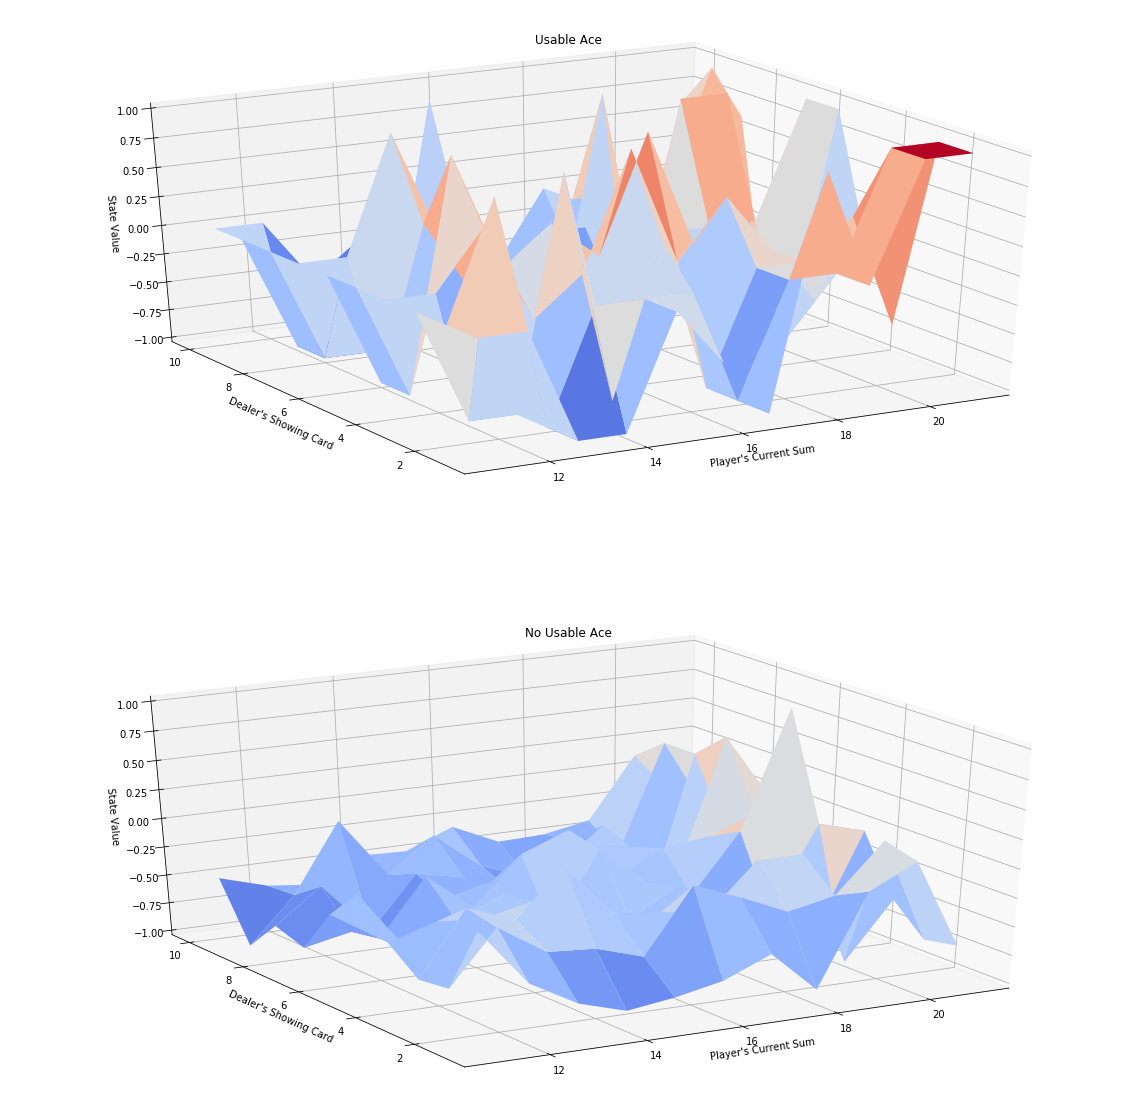

In [298]:
# Plot the State-Value function
plot_blackjack_values(Q)